In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/focusing-on-mobile-app-or-website/Ecommerce Customers


# Importing Necessary Libraries

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# Reading the csv

In [29]:
e_comm_df = pd.read_csv('../input/focusing-on-mobile-app-or-website/Ecommerce Customers')
e_comm_df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# information of data

In [30]:
e_comm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# showing the keys in E-commerce Dataset and total data taken

In [31]:
print("The keys in E-commerce Dataset : \n{}".format(e_comm_df.keys()))
print("The total number of data taken : {}".format(e_comm_df.shape))

The keys in E-commerce Dataset : 
Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')
The total number of data taken : (500, 8)


# Performing Data cleaning

In [32]:
e_comm_df = e_comm_df.drop(['Email', 'Address', 'Avatar'], axis = 1)

In [33]:
print("The keys in E-commerce Dataset after cleaning : \n{}".format(e_comm_df.keys()))
e_comm_df

The keys in E-commerce Dataset after cleaning : 
Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


In [34]:
feature_names = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']
scaler = MinMaxScaler()
e_comm_df[feature_names] = scaler.fit_transform(e_comm_df[feature_names])
e_comm_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,0.751425,0.626620,0.929816,0.573101,587.951054
1,0.362306,0.393016,0.550801,0.359869,392.204933
2,0.524953,0.426378,0.524803,0.576396,487.547505
3,0.722409,0.787050,0.460890,0.428434,581.852344
4,0.574861,0.647702,0.594748,0.627768,599.406092
...,...,...,...,...,...
495,0.560784,0.764183,0.411098,0.522589,573.847438
496,0.782491,0.481592,0.537882,0.497028,529.049004
497,0.471354,0.451931,0.725412,0.704722,551.620145
498,0.573625,0.586699,0.480394,0.310634,456.469510


# visualizing the cleaned Data

<Figure size 1440x1440 with 0 Axes>

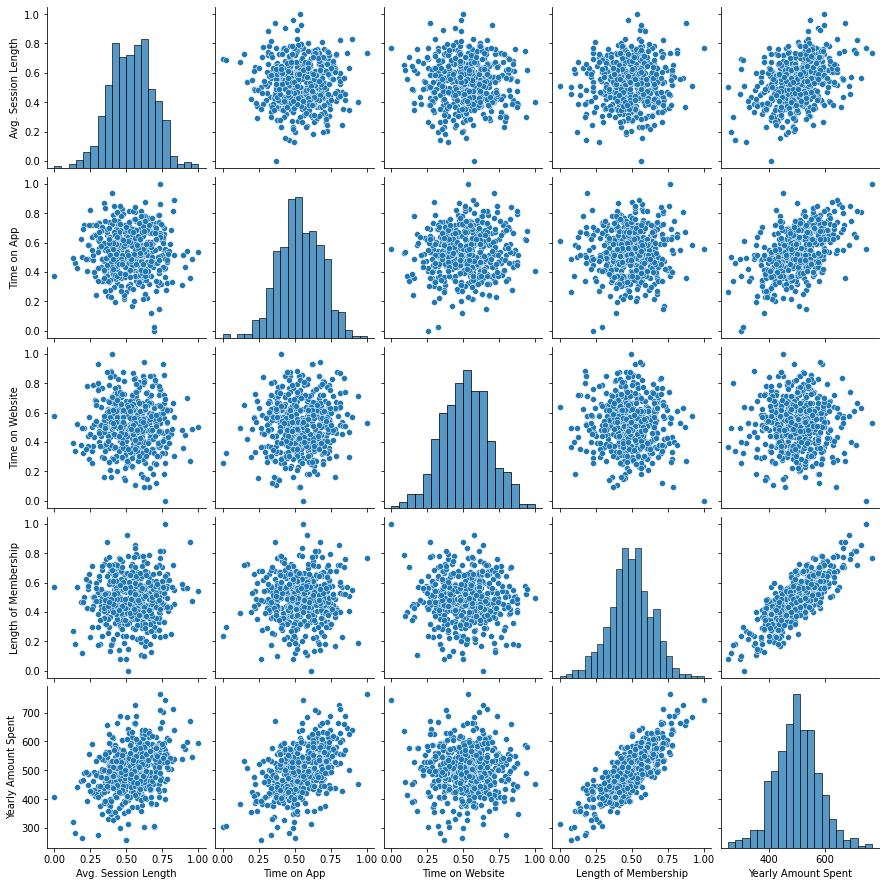

In [35]:
plt.figure(figsize = (20,20))
sns.pairplot(data = e_comm_df)
plt.show()

<AxesSubplot:>

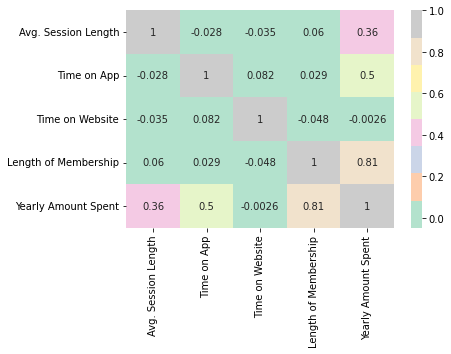

In [36]:
sns.heatmap(e_comm_df.corr(), annot = True, cmap = 'Pastel2')

# Splitting dataset to X and Y variables

In [37]:
X = e_comm_df.drop('Yearly Amount Spent', axis = 1)
y = e_comm_df['Yearly Amount Spent']

print('The shape of X matrix : \n{}'.format(X.shape))
print('The shape of y : \n{}'.format(y.shape))

The shape of X matrix : 
(500, 4)
The shape of y : 
(500,)


# splitting the data for training and testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
print('Total X_train data : \n{}'.format(X_train.shape))
print('Total X_test data : \n{}'.format(X_test.shape))
print('Total y_train data : \n{}'.format(y_train.shape))
print('Total y_test data : \n{}'.format(y_test.shape))

Total X_train data : 
(400, 4)
Total X_test data : 
(100, 4)
Total y_train data : 
(400,)
Total y_test data : 
(100,)


# performing Linear Regression on model

In [40]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

applying trained model to make prediction on test set

In [41]:
y_pred = lin_reg.predict(X_test)

Testing accuracy

In [42]:
print(f'The accuracy of training data: {lin_reg.score(X_train, y_train)}')
print(f'The accuracy of testing data: {lin_reg.score(X_test, y_test)}')

The accuracy of training data: 0.9854240629700333
The accuracy of testing data: 0.9778130629184126


# performance of the model

In [43]:
print(f'Coefficients of the model : {lin_reg.coef_}' )
print(f'Intercept/bias_term : {lin_reg.intercept_}')
print('Mean squared error(MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Mean absolute error (MAE): %.2f'
      % mean_absolute_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients of the model : [169.12046116 256.71408136   1.89066451 411.78649366]
Intercept/bias_term : 68.88631752457144
Mean squared error(MSE): 109.86
Mean absolute error (MAE): 8.56
Coefficient of determination (R^2): 0.98


# plotting the data

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The graph of Actual Vs Predicted Values')

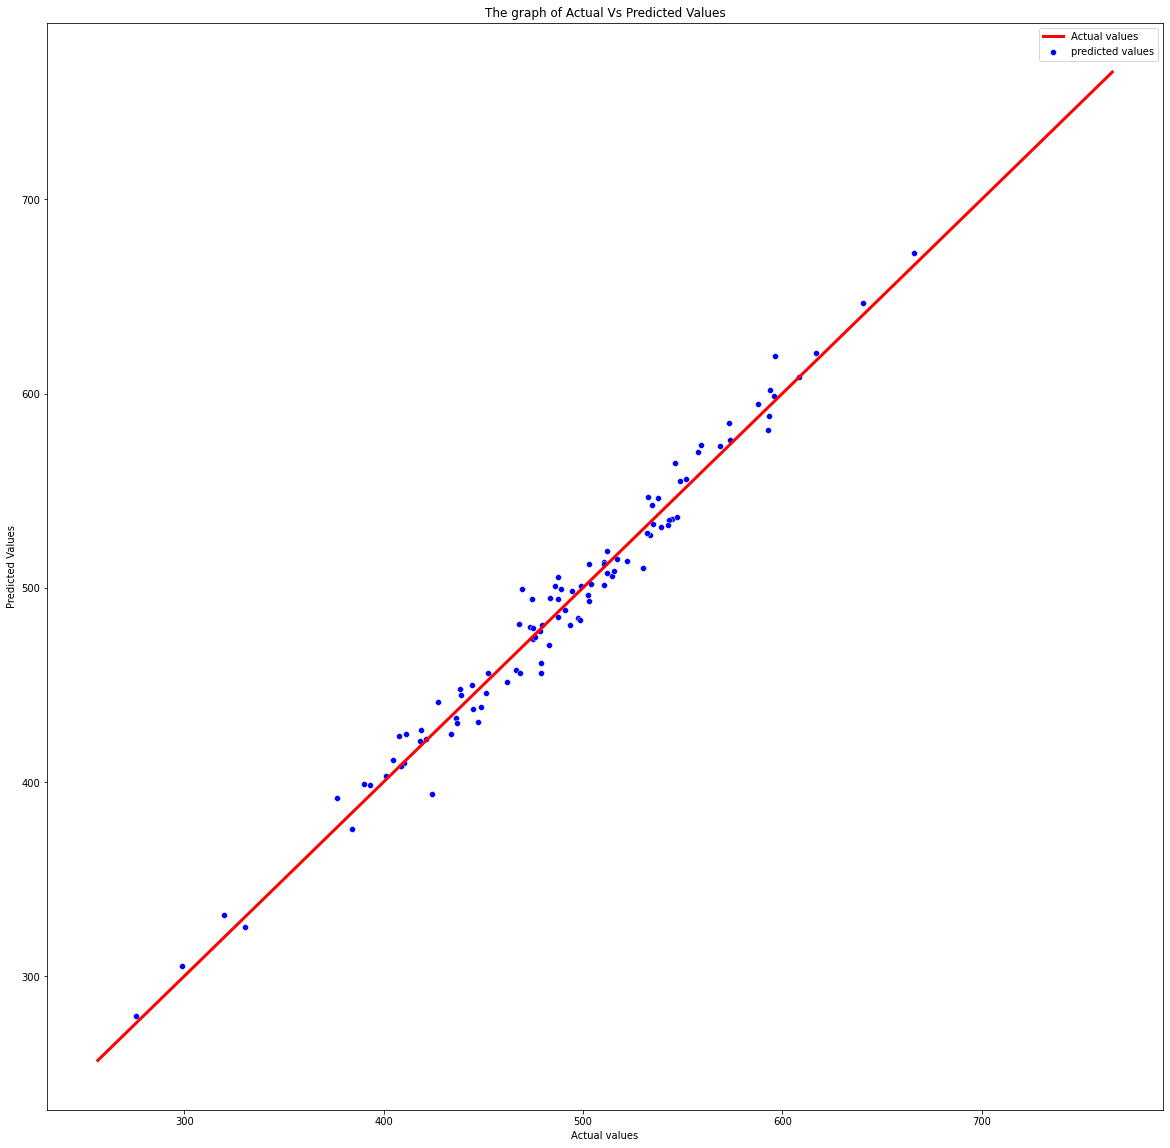

In [44]:
plt.figure(figsize = (20,20))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', label = 'Actual values', linewidth=3)
sns.scatterplot(y_test, y_pred, color = 'blue', label = 'predicted values')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.title('The graph of Actual Vs Predicted Values')